# Import Libraries and Data

In [69]:
import pandas as pd # dataframe/data cleaning/manipulation
import numpy as np # array computations
from matplotlib import pyplot as plt # plotting/graphing
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text # Decision tree algorithm and plotting functions for the Decision tree
from sklearn.model_selection import cross_val_predict # cross validation prediction function

Note: If you are using Google Colab, you must upload the training CSV from Canvas by doing the following:

* On the left-side bar, click the folder icon.
* Click the 'Upload to session storage' button.
* Upload the CSV file; it will appear below the 'sample_data' folder.

**Unfortunately, this process must be done every time the runtime is disconnected - just a quirk with Google Colab.**

If you are using Jupyter notebook, just make sure the training CSV file is in the same folder location as this .ipynb file.

In [45]:
training_df = pd.read_csv('training_data.csv',index_col=0)
training_df.head()

,age,income,married,children,car,save_act,current_act,mortgage,pep,sex_FEMALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN
0,48.0,17546.0,False,1.0,False,False,False,False,True,1,1,0,0,0
1,40.0,30085.1,True,3.0,True,False,True,True,False,0,0,0,0,1
2,51.0,16575.4,True,0.0,True,True,True,False,False,1,1,0,0,0
3,23.0,20375.4,True,3.0,False,False,True,False,False,1,0,0,0,1
4,57.0,50576.3,True,0.0,False,True,False,False,False,1,0,1,0,0


# Instructions and Workspace

**For this Instapoll assignment, your task is to use Scikit-Learn, Pandas, and Matplotlib to create two charts: a lift chart and a profit-lift chart!**

As a reminder, **a lift chart** is used for ranking class probability estimations (CPEs) and in the context of our British Bank dataset, to prioritize which customers to target (or which customers have the highest probability to purchase a Personal Equity Plan (PEP).

**A profit lift chart** differs slightly in that while the x-axis stays the same between both charts (number or percent of targeted population size), the y-axis is now your cumulative profit (as opposed to the number or percent of positive classes).

As with the other Instapoll assignments, please try your best and if you have any questions, please reach out to the Professor or TA!

**To begin, please create your `X` and `y` variables.**

- **Note:** The use of the `train_test_split()` function is not required. Please build your `X` and `y` variables based solely off the training set.

In [46]:
X = training_df.drop(columns=['pep'])
y = training_df.pep

**Next, create and fit a decision tree model setting the following parameters:**

- `criterion = entropy`
- `max_depth = 6`
- `random_state = 0`

This will be the model used for calculating the necessary probabilities later on.

In [47]:
decision_tree_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, random_state = 0).fit(X, y)

**Now you are ready to use cross-validation to predict the probabilities for each record using the decision tree model. To do so, please create a variable called `prob_pred` and use the [cross_val_predict()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) function.**

- **Note:** This is different than generating cross-validated predictions for each data point in the dataset as we are interested in the *probabilities* associated with those predictions.

- **Hint:** Set `cv = 10` and `method = predict_proba`.

In [48]:
prob_pred = cross_val_predict(decision_tree_model, X, y, cv = 10, method = 'predict_proba')
prob_pred

array([[0.       , 1.       ],
       [0.9375   , 0.0625   ],
       [0.5      , 0.5      ],
       ...,
       [0.9137931, 0.0862069],
       [0.9137931, 0.0862069],
       [0.       , 1.       ]])

The resulting output of `prob_pred`, if done correctly, should be an array of arrays object where each sub-array contains two values representing the model's estimated probabilities for each class for the corresponding data point in `X`.
  -  For example, in `[0.9375, 0.0625]`, the model predicts there is a 93.75% probability of the negative class (0 for PEP) and a 6.25% probability of the positive class (1 for PEP). The sum of probabilities in each sub-array equals 1, as they represent the complete set of possible outcomes for each instance.



**From here, please create a Pandas dataframe named `prob_df` that has three columns:**

- `'True'` - This column should contain the true 'y' values from the dataset.
- `'Prob'` - This column contains the predicted probabilities *for the positive class,* as this is what we are interested in.
- `'TP'` - This column contains the true positive values (these will be filled later on, so for now, set every value equal to 0).

This dataframe will be iterated through to plot the lift chart.

In [49]:
prob_df = pd.DataFrame()
prob_df['True'] = y
prob_df['Prob'] = prob_pred[:, 1]
prob_df['TP'] = 0
prob_df

,True,Prob,TP
0,True,1.000000,0
1,False,0.062500,0
2,False,0.500000,0
3,False,0.058824,0
4,False,0.000000,0
...,...,...,...
595,False,1.000000,0
596,False,0.086207,0
597,True,0.086207,0
598,False,0.086207,0


**Next, please sort the dataframe by the predictied probabilites in descending order.**

- Hint: Use the [sort_values()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) function and use the `ascending` parameter.



In [50]:
prob_df = prob_df.sort_values(by = 'Prob', ascending = False)
prob_df

,True,Prob,TP
0,True,1.0,0
264,True,1.0,0
280,True,1.0,0
277,True,1.0,0
273,True,1.0,0
...,...,...,...
141,False,0.0,0
62,False,0.0,0
377,False,0.0,0
385,False,0.0,0


**Now you are ready to set the TP values to 1 in your dataframe for records with a value of 'True' in your `True` column! Please fill in the code below.**


In [29]:
#prob_df.loc[prob_df['True'] == True, 'TP'] = 1

In [51]:
for index,row in prob_df.iterrows():
    if row['True'] == True:
        row['TP'] = 1

**The last thing needed before plotting the lift chart is to count the total number of cumulative positive cases, which will serve as the y-axis for the lift chart, and normalize the x-values to represent the proportion of customers targeted as opposed to the sample size. Please fill in the code below.**

In [52]:
x = len(prob_df)
cumulative_pos = []
pos_count = 0
for index, row in prob_df.iterrows():
    if row['True'] == True:
        pos_count += 1
    cumulative_pos.append(pos_count)

proportion_customers = [i / x for i in range(1, x+1)]

**If all of the steps above were performed correctly, the following code should output your completed lift chart!**

- **Note:** The random lift line illustrates the expected outcome if you were to make predictions or selections randomly, without any model. It serves as a benchmark to show how a model performs compared to random guessing. In this plot, the random lift line indicates that if you randomly select a subset of the total population, you would expect to capture a proportional number of positive cases.

  - For instance, if you randomly select 50% of your customers, you would expect to identify approximately 50% of all positive cases (if positive and negative cases are evenly distributed in the population).

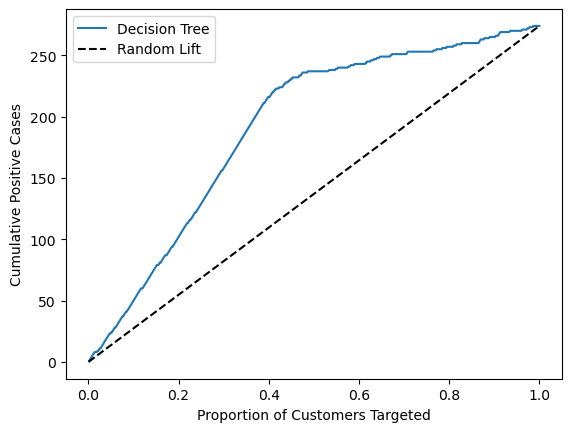

In [53]:
plt.plot(proportion_customers, cumulative_pos)
plt.plot([0, 1], [0, pos_count], 'k--') # Creates the random lift line.
plt.legend(['Decision Tree', 'Random Lift'])
plt.xlabel("Proportion of Customers Targeted")
plt.ylabel("Cumulative Positive Cases")
plt.show()

Here is what your lift chart should similar to for reference:

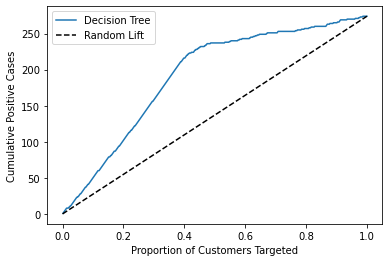

In [3]:
# Do not run this cell! If you do by accident, you can redownload this file from Canvas.

**To create the profit-lift chart, we are providing you with the following cost matrix, where for every true positive, you recieve a benefit of 100 dollars. For every false positive, you incur a loss of 70 dollars.**

In [54]:
cost_matrix = np.array(([100, 70], [0, 0]))

**Your last task is to define a function named `plot_profit_curve`, which when run, will output the completed profit chart for your decision tree model!**

While we are leaving this open-ended for you to solve, here is our recommended approach to produce the profit-lift chart:

1. **Begin by defining the function, `plot_profit_curve`, which takes parameters like your decision tree model, feature set (X), target variable (y), and cost matrix.** Additionally, you may wish to define a `n_points` parameter to determine the granularity of the curve.

2. **Outer Loop - Create Probability Predictions:** Utilize `cross_val_predict` to generate probability predictions for each instance in the dataset, using a 10-fold cross-validation approach. Store the true labels and predicted probabilities in a DataFrame.

3. **Inner Loop - Calculate Cumulative Profit:** For each threshold within a range created by np.linspace(), perform the following steps:

  - Data Sorting: Sort the DataFrame in descending order based on the predicted probabilities.

  - Subsetting Data: Choose a subset of the sorted DataFrame up to the current threshold.

  - Profit Calculation: Calculate True Positives (TP) and False Positives (FP) within this subset. Then, compute the profit based on TP, FP, and your cost matrix.

  - Store Results: Append the calculated profit to a list for later plotting.

  - Hint: You might want to calculate and store the profit for a random model as a baseline comparison.

4. **Plot the Profit-Lift Chart:** Using Matplotlib, plot the cumulative profits against the corresponding thresholds.

  - Label your axes appropriately (e.g., "Proportion of Population" for the x-axis and "Cumulative Net Revenue" for the y-axis). Include the plot for the random model for comparison.

5. **Execution:** Call the `plot_profit_curve` function with the appropriate parameters to generate and display the profit-lift chart.

**Your end result should look something like the following:**

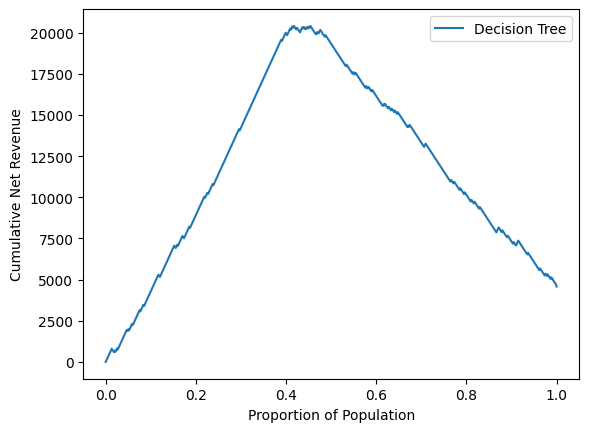

In [ ]:
# Do not run this cell! If you do by accident, you can redownload this file from Canvas.

**Please perform your coding in the cell(s) below and try your best! You are not required to follow the instructions we have provided explicitly if you discover a more efficient methodology (especially if you find a way to code your function so that it can accomodate multiple models)!**

**If you have any questions, please reach out to the Professor or TA!**

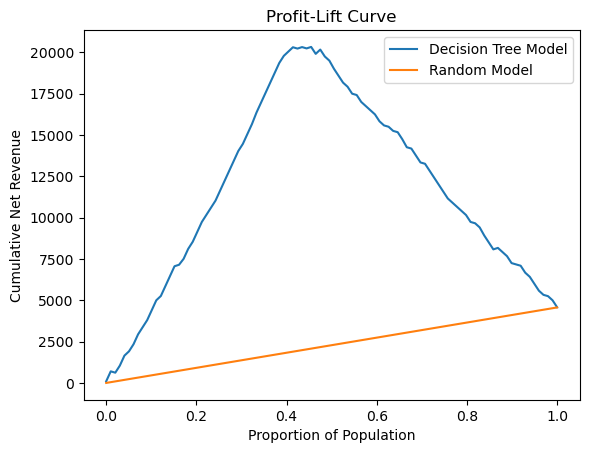

In [117]:
def plot_profit_curve(model, X, y, cost_matrix, n_points=100):
    # Calculate the profit for a random model as baseline
    random_model_prop = np.sum(y) / len(y)
    
    # Initialize lists to store thresholds and profits
    thresholds = np.linspace(0, 1, n_points)
    profits = []
    random_profits = []
    
    # Outer loop: Cross-validated probability predictions
    y_proba = cross_val_predict(model, X, y, cv=10, method='predict_proba')[:, 1]
    profit_df = pd.DataFrame({'true_label': y, 'predicted_proba': y_proba, 'y_pred': 0})
    
    for threshold in thresholds:
        # Sort DataFrame by predicted probabilities
        profit_df_sorted = profit_df.sort_values(by='predicted_proba', ascending=False)
        profit_df_sorted.reset_index(inplace=True)
        
        # Subset data based on threshold
        subset = profit_df_sorted[profit_df_sorted.index <= threshold * len(profit_df_sorted)]
        
        # Calculate confusion matrix
        for index, row in profit_df_sorted.iterrows():
            if index in subset['index']:
                profit_df_sorted.loc[index,'y_pred'] = 1
            else:
                profit_df_sorted.loc[index,'y_pred'] = 0

        tp = sum((profit_df_sorted['y_pred'] == 1) & (profit_df_sorted['true_label'] == 1))
        fp = sum((profit_df_sorted['y_pred'] == 1) & (profit_df_sorted['true_label'] == 0))
        
        # Calculate profit
        profit = tp * cost_matrix[0, 0] - fp * cost_matrix[0, 1]
        profits.append(profit)
        
        random_profit = random_model_prop * cost_matrix[0, 0] * threshold * 100
        random_profits.append(random_profit)
    
    # Plot the profit-lift curve
    plt.figure()
    plt.plot(thresholds, profits, label='Decision Tree Model')
    plt.plot(thresholds, random_profits, label='Random Model')
    plt.xlabel('Proportion of Population')
    plt.ylabel('Cumulative Net Revenue')
    plt.title('Profit-Lift Curve')
    plt.legend()
    
plot_profit_curve(decision_tree_model, X, y, cost_matrix)